In [40]:
import numpy as np
import matplotlib
%matplotlib inline

import numpy as np

#reading text from files (note that this is a relative path, so the text file must be in your current working directory)
with open("moby_dick.txt") as md:
    md_text = md.read()

print(type(md_text))

<class 'str'>


In [ ]:
#convert newlines and tabs to spaces
md_text = md_text.replace('\n', ' ').replace('\t', ' ')
#remove no-alpha characters, convert all to lowercase

md_chars = []
for char in md_text:
    char = char.lower()
    if char.isalpha():
        md_chars.append(char)
    else:
        md_chars.append(' ')
md_no_punct = ''.join(md_chars)

#or with list comprehension, a loop shortcut ... much faster!
#md_no_punct = ''.join(char.lower() if char.isalpha() else ' ' for char in md_text )

In [46]:
#tokenization: convert string of moby_dick to a list of terms
md_tokens = [i for i in md_no_punct.split(' ') if i != '']

#slicing a list. There are better ways to remove front and back matter, but I wanted to show you how to traverse a list
md_minus_front_back = md_tokens[3892:-2994]

#matching ... get all words that end with 'ing'
ing_words = []
for i in md_minus_front_back:
    if i[-3:] == 'ing':
        ing_words.append(i)
        
from collections import Counter
ing_counts = Counter(ing_words)
print(ing_counts.most_common()[:50])

[('being', 218), ('thing', 186), ('whaling', 126), ('something', 122), ('nothing', 114), ('going', 89), ('standing', 82), ('morning', 74), ('living', 71), ('looking', 70), ('having', 65), ('king', 57), ('coming', 53), ('taking', 52), ('turning', 52), ('running', 46), ('making', 45), ('touching', 44), ('anything', 43), ('saying', 40), ('concerning', 40), ('seeing', 37), ('leaving', 37), ('holding', 37), ('cutting', 37), ('spring', 35), ('sailing', 34), ('rolling', 34), ('rigging', 34), ('drawing', 33), ('during', 32), ('considering', 31), ('rising', 31), ('flying', 30), ('leaning', 28), ('swimming', 28), ('thinking', 28), ('giving', 28), ('feeling', 28), ('eyeing', 27), ('lightning', 27), ('cruising', 27), ('getting', 26), ('according', 26), ('bearing', 25), ('pulling', 24), ('floating', 24), ('owing', 24), ('following', 24), ('speaking', 23)]


According to Zipf's law, the alpha value (1.16) should be close to 1.


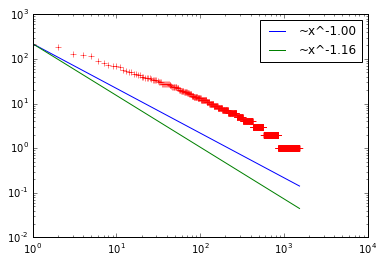

In [35]:
def powerLaw(y, x):
    """
    'When the frequency of an event varies as power of some attribute of that
    event the frequency is said to follow a power law.' (wikipedia)
    This is represented by the following equation, where c and alpha are
    constants:
    y = c . x ^ alpha
    Args
    --------
    y: array with frequency of events >0
    x: numpy array with attribute of events >0
    Output
    --------
    (c, alpha)
    c: the maximum frequency of any event
    alpha: defined by (Newman, 2005 for details):
        alpha = 1 + n * sum(ln( xi / xmin )) ^ -1
    """
    c = 0
    alpha = .0

    if len(y) and len(y)==len(x):
        c = max(y)
        xmin = float(min(x))
        alpha = 1 + len(x) * pow(sum(np.log(x/xmin)),-1)

    return (c, alpha)


import matplotlib.pyplot as plt

def plotPowerLaws(y, x, c=[], alpha=[]):
    """
    Plots the relationship between x and y and a fitted power law on LogLog
    scale.
    Args
    --------
    y: array with frequency of events >0
    x: array with attribute of events >0
    c: array of cs for various power laws
    alpha: array of alphas for various power laws
    """
    plt.figure()
    plt.loglog()
    plt.plot(x,
             y,
             'r+')
    for _c, _alpha in zip(c,alpha):
        plt.plot( (1, max(x)),
                  (_c, _c * pow(max(x), _alpha)),
                  label='~x^%.2f' % _alpha)
        plt.legend()
    plt.show()

"""
Checking against Zipfs law, where the frequency and rank of a word follow a specific power law
"""

y = [i[1] for i in ing_counts.most_common()]

x = np.array(range(1,len(y)+1))

#y is a list of counts
#x is an np array of ranks

c, alpha = powerLaw(y, x)
print('According to Zipf\'s law, the alpha value (%.2f) should be close to 1.' % alpha)
plotPowerLaws(y, x, [c,c], [-1,-alpha])


Note that if we disregard words that appear once, our alpha moves slightly away from 1 (1.17376317504)


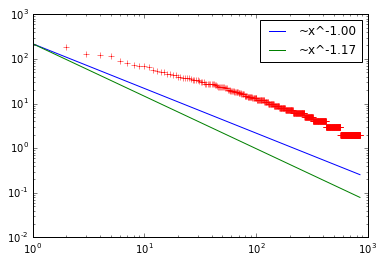

Powerlaw functions courtesy of https://gist.github.com/diogojc/1394300


In [49]:
y = [i[1] for i in ing_counts.most_common() if i[1] > 1 ]

x = np.array(range(1,len(y)+1))

#y is a list of counts
#x is an np array of ranks

c, alpha = powerLaw(y, x)
print('Note that if we disregard words that appear once, our alpha moves slightly away from 1 (%s)' % alpha)
plotPowerLaws(y, x, [c,c], [-1,-alpha])
print("""Powerlaw functions courtesy of https://gist.github.com/diogojc/1394300""")